In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')

from server2022.src.train_val import *
from server2022.src.model import *
from server2022.data.processed.prepare_data import *

In [2]:
# agents2019 = pd.read_csv('../data/raw/agents2019.csv', index_col='Unnamed: 0')
# agents2020 = pd.read_csv('../data/raw/agents2020.csv')
# for c in [col for col in agents2020.columns if 'Факт' in col]:
#     agents2020[c] = agents2020[c].apply(lambda x: float(x) if x not in ['Х', 'Н/Д'] else np.nan)
# agents2021 = pd.read_csv('../data/raw/agents2021.csv', index_col='Unnamed: 0')

# cbr = pd.read_csv('../data/raw/cbr.csv')
# inflation = pd.read_csv('../data/raw/inflation.csv')

In [3]:
#df = create_df_0years_known()
df = create_df_1year_known()

In [4]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]
# df = df.fillna(0)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df.head(3)

,Наименование ДП,Итого,"-4, Нематериальные активы, RUB","-3, Нематериальные активы, RUB","-2, Нематериальные активы, RUB","-1, Нематериальные активы, RUB","-4, Основные средства , RUB","-3, Основные средства , RUB","-2, Основные средства , RUB","-1, Основные средства , RUB","-4, Внеоборотные активы, RUB","-3, Внеоборотные активы, RUB","-2, Внеоборотные активы, RUB","-1, Внеоборотные активы, RUB","-4, Дебиторская задолженность, RUB","-3, Дебиторская задолженность, RUB","-2, Дебиторская задолженность, RUB","-1, Дебиторская задолженность, RUB","-4, Оборотные активы, RUB","-3, Оборотные активы, RUB","-2, Оборотные активы, RUB","-1, Оборотные активы, RUB","-4, Уставный капитал , RUB","-3, Уставный капитал , RUB","-2, Уставный капитал , RUB","-1, Уставный капитал , RUB","-4, Капитал и резервы, RUB","-3, Капитал и резервы, RUB","-2, Капитал и резервы, RUB","-1, Капитал и резервы, RUB","-4, Заёмные средства (долгосрочные), RUB","-3, Заёмные средства (долгосрочные), RUB","-2, Заёмные средства (долгосрочные), RUB","-1, Заёмные средства (долгосрочные), RUB","-4, Долгосрочные обязательства, RUB","-3, Долгосрочные обязательства, RUB","-2, Долгосрочные обязательства, RUB","-1, Долгосрочные обязательства, RUB","-4, Заёмные средства (краткосрочные), RUB","-3, Заёмные средства (краткосрочные), RUB","-2, Заёмные средства (краткосрочные), RUB","-1, Заёмные средства (краткосрочные), RUB","-4, Кредиторская задолженность, RUB","-3, Кредиторская задолженность, RUB","-2, Кредиторская задолженность, RUB","-1, Кредиторская задолженность, RUB","-4, Краткосрочные обязательства, RUB","-3, Краткосрочные обязательства, RUB","-2, Краткосрочные обязательства, RUB","-1, Краткосрочные обязательства, RUB","-4, Выручка, RUB","-3, Выручка, RUB","-2, Выручка, RUB","-1, Выручка, RUB","-4, Себестоимость продаж, RUB","-3, Себестоимость продаж, RUB","-2, Себестоимость продаж, RUB","-1, Себестоимость продаж, RUB","-4, Прибыль (убыток) до налогообложения , RUB","-3, Прибыль (убыток) до налогообложения , RUB","-2, Прибыль (убыток) до налогообложения , RUB","-1, Прибыль (убыток) до налогообложения , RUB","-4, Прибыль (убыток) от продажи, RUB","-3, Прибыль (убыток) от продажи, RUB","-2, Прибыль (убыток) от продажи, RUB","-1, Прибыль (убыток) от продажи, RUB",year,binary_target,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.","Нематериальные активы ,прирост за -3 год","Нематериальные активы ,прирост за -2 год","Нематериальные активы ,прирост за -1 год","Основные средства ,прирост за -3 год","Основные средства ,прирост за -2 год","Основные средства ,прирост за -1 год","Внеоборотные активы ,прирост за -3 год","Внеоборотные активы ,прирост за -2 год","Внеоборотные активы ,прирост за -1 год","Дебиторская задолженность ,прирост за -3 год","Дебиторская задолженность ,прирост за -2 год","Дебиторская задолженность ,прирост за -1 год","Оборотные активы ,прирост за -3 год","Оборотные активы ,прирост за -2 год","Оборотные активы ,прирост за -1 год","Уставный капитал ,прирост за -3 год","Уставный капитал ,прирост за -2 год","Уставный капитал ,прирост за -1 год","Капитал и резервы ,прирост за -3 год","Капитал и резервы ,прирост за -2 год","Капитал и резервы ,прирост за -1 год","Заёмные средства (долгосрочные) ,прирост за -3 год","Заёмные средства (долгосрочные) ,прирост за -2 год","Заёмные средства (долгосрочные) ,прирост за -1 год","Долгосрочные обязательства ,прирост за -3 год","Долгосрочные обязательства ,прирост за -2 год","Долгосрочные обязательства ,прирост за -1 год","Заёмные средства (краткосрочные) ,прирост за -3 год","Заёмные средства (краткосрочные) ,прирост за -2 год","Заёмные средства (краткосрочные) ,прирост за -1 год","Кредиторская задолженность ,прирост за -3 год","Кредиторская задолженность ,прирост за -2 год","Кредиторская задолженность ,прирост за -1 год","Краткосрочные обязательства ,прирост за -3 год","Краткосрочные обязательства 

In [18]:
new_cols = []
for col in df.columns:
    for m in ['Основные средства', 
            'Внеоборотные активы',
            'Дебиторская задолженность',
            'Оборотные активы',
            'Кредиторская задолженность',
             'Краткосрочные обязательства']:
        if m in col:
            new_cols.append(col)

In [5]:
new_cols

['-4, Основные средства , RUB',
 '-3, Основные средства , RUB',
 '-2, Основные средства , RUB',
 '-1, Основные средства , RUB',
 '-4, Внеоборотные активы, RUB',
 '-3, Внеоборотные активы, RUB',
 '-2, Внеоборотные активы, RUB',
 '-1, Внеоборотные активы, RUB',
 '-4, Дебиторская задолженность, RUB',
 '-3, Дебиторская задолженность, RUB',
 '-2, Дебиторская задолженность, RUB',
 '-1, Дебиторская задолженность, RUB',
 '-4, Оборотные активы, RUB',
 '-3, Оборотные активы, RUB',
 '-2, Оборотные активы, RUB',
 '-1, Оборотные активы, RUB',
 '-4, Кредиторская задолженность, RUB',
 '-3, Кредиторская задолженность, RUB',
 '-2, Кредиторская задолженность, RUB',
 '-1, Кредиторская задолженность, RUB',
 '-4, Краткосрочные обязательства, RUB',
 '-3, Краткосрочные обязательства, RUB',
 '-2, Краткосрочные обязательства, RUB',
 '-1, Краткосрочные обязательства, RUB',
 'Основные средства  ,прирост за -3 год',
 'Основные средства  ,прирост за -2 год',
 'Основные средства  ,прирост за -1 год',
 'Внеоборотные

In [5]:
new_cols = new_cols + ['Наименование ДП', 'Итого', 'year', 'binary_target'] + \
['Макс. ПДЗ за -1 год, дней',
 'Сред. ПДЗ за -1 год, дней',
 'Кол-во просрочек свыше 5-ти дней за -1 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.']
df_new = df[new_cols]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000019C853073A0> with treshold = 0.5...


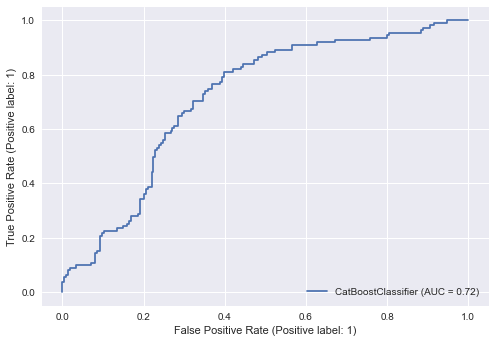

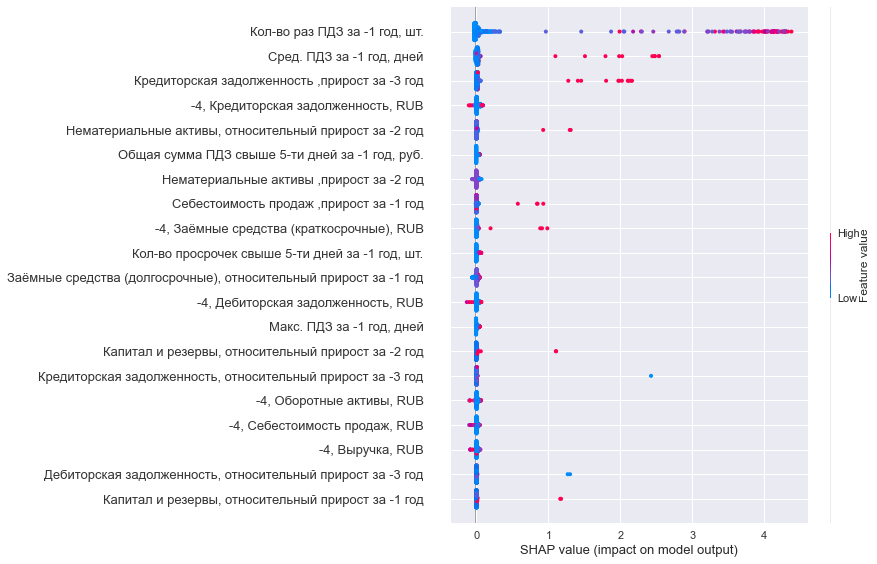

F1 = 0.3425, Precision = 0.4429, Recall = 0.2793, Accuracy = 0.6338, ROC_AUC = 0.7156


In [124]:
model = CatBoostClassifier(iterations=20000,
                           depth=5, 
                           l2_leaf_reg=5, 
                           learning_rate=0.001,
                           loss_function='Logloss',
                           use_best_model=False,
                           eval_metric='AUC',
                           verbose=False,
                           class_weights=[1, 0.01], # (df.shape[0] - df.binary_target.sum()) / df.binary_target.sum()],
                           random_seed=RANDOM_STATE,
                          )

# model = RandomForestClassifier(n_estimators=30)
# model = LogisticRegression(penalty='l2', C=1e-1, class_weight=[1, 1e-4])
make_report(model, df, treshold=0.5, to_file=True, file_path='../reports/report_petr.csv', create_new_clients=False, comment=f'w=0.01, 20k iter, lr=0.001')

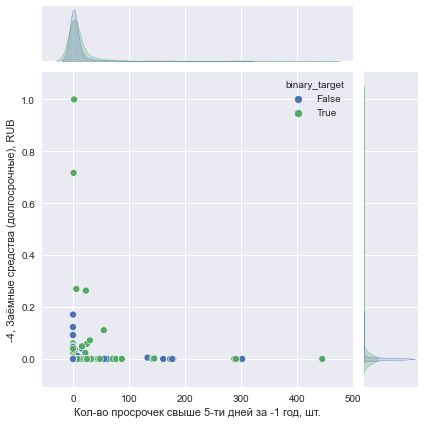

In [37]:
sns.jointplot(data=df, x='Кол-во просрочек свыше 5-ти дней за -1 год, шт.', y='-4, Заёмные средства (долгосрочные), RUB', hue='binary_target')

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F41CE23970> with treshold = 0.6...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

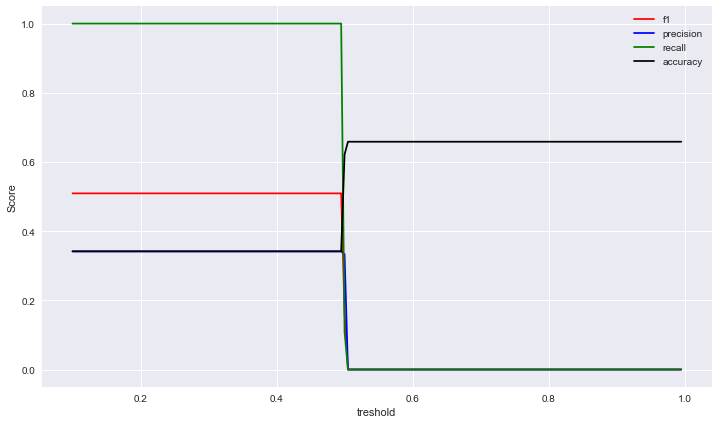

In [9]:
model = CatBoostClassifier(iterations=1000,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           learning_rate=1e-6,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='F1',
                           verbose=False,
                           class_weights=[1, 1e-3],
                          )

#model = RandomForestClassifier(n_estimators=30)
validate_treshold(model, df)

In [8]:
X_train, X_test, y_train, y_test = data_split(df)

-4, Основные средства , RUB


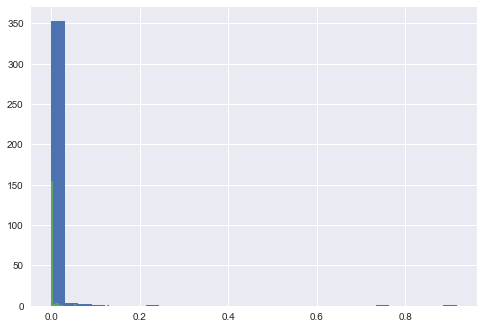

-3, Основные средства , RUB


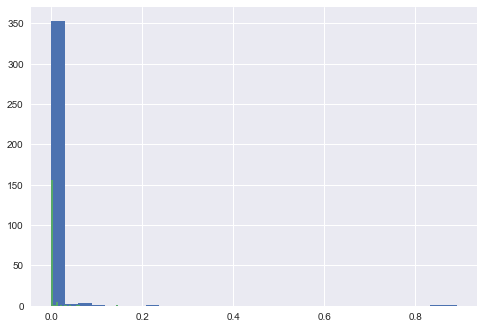

-2, Основные средства , RUB


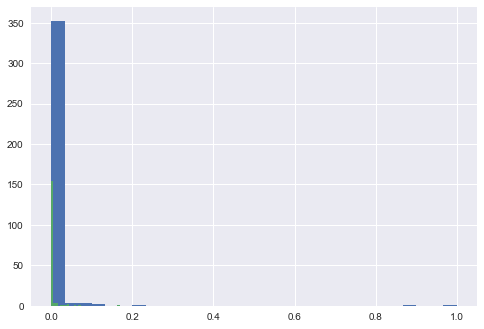

-1, Основные средства , RUB


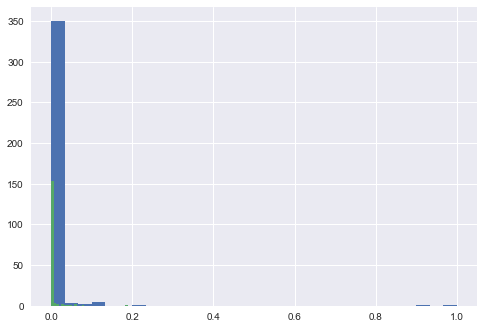

-4, Внеоборотные активы, RUB


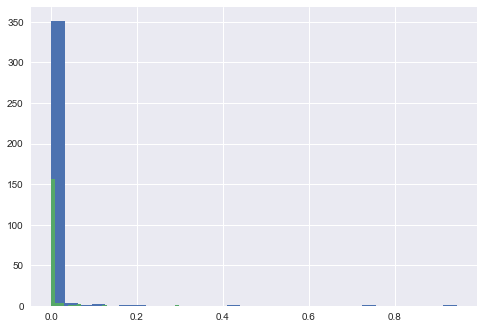

-3, Внеоборотные активы, RUB


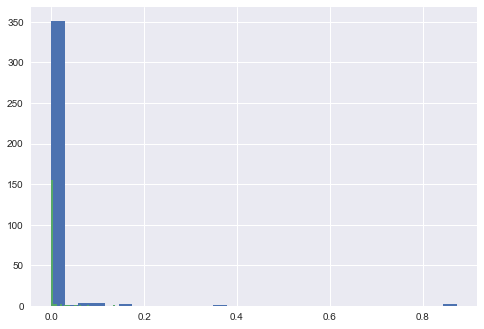

-2, Внеоборотные активы, RUB


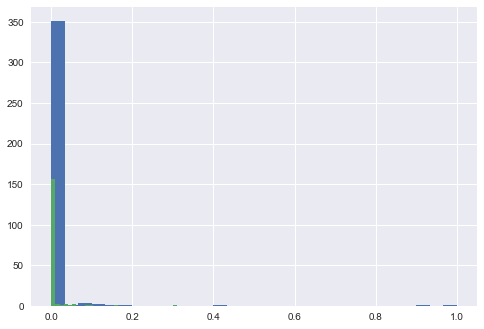

-1, Внеоборотные активы, RUB


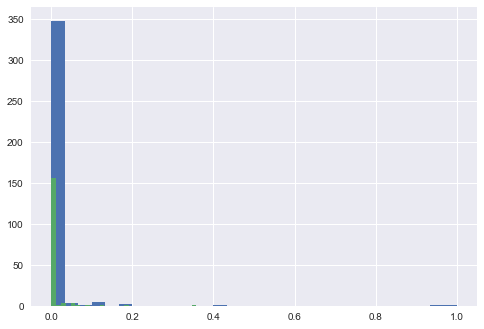

-4, Дебиторская задолженность, RUB


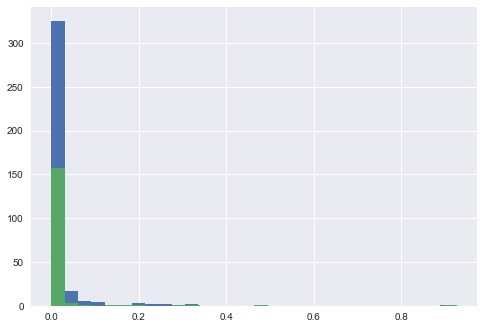

-3, Дебиторская задолженность, RUB


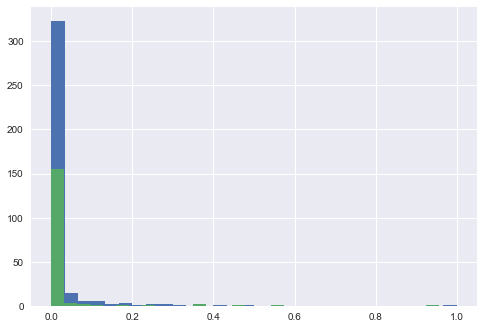

-2, Дебиторская задолженность, RUB


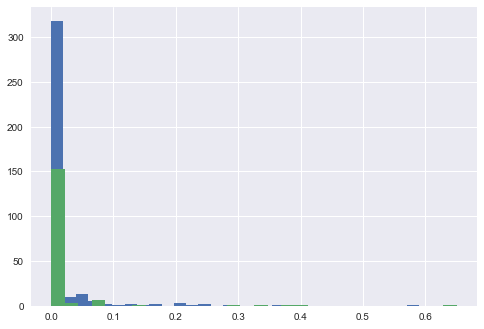

-1, Дебиторская задолженность, RUB


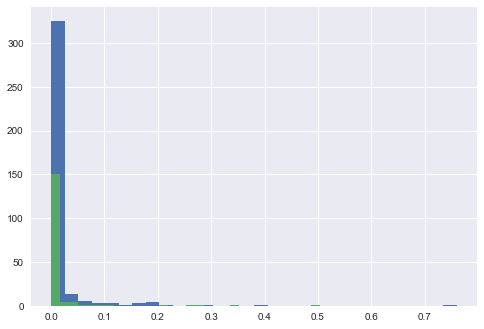

-4, Оборотные активы, RUB


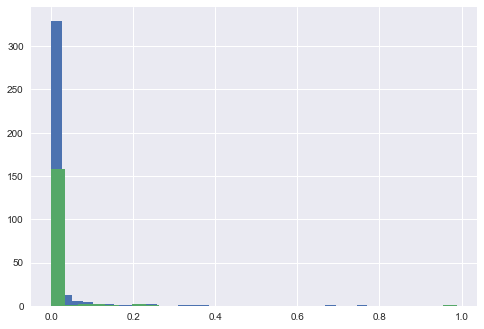

-3, Оборотные активы, RUB


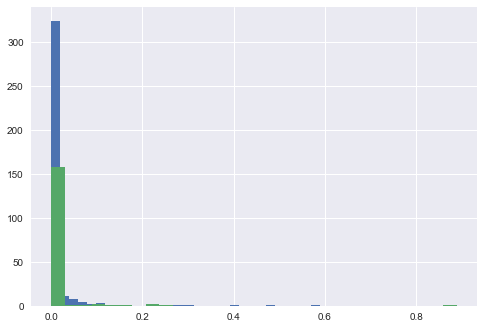

-2, Оборотные активы, RUB


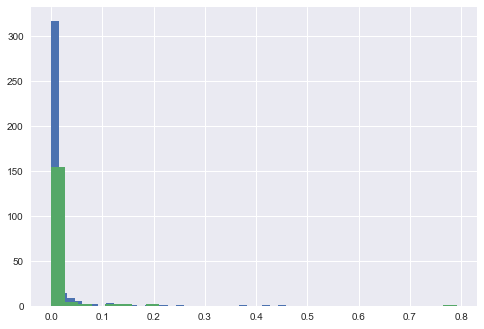

-1, Оборотные активы, RUB


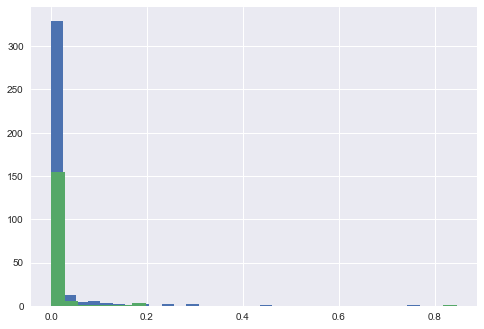

-4, Кредиторская задолженность, RUB


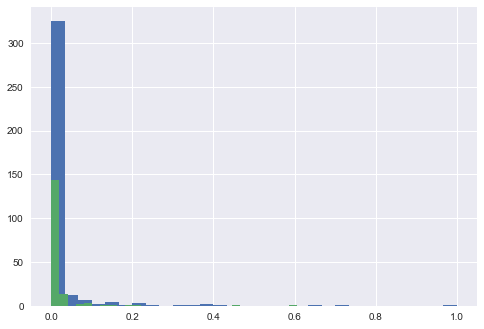

-3, Кредиторская задолженность, RUB


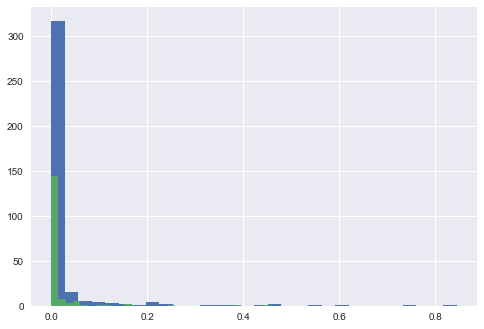

-2, Кредиторская задолженность, RUB


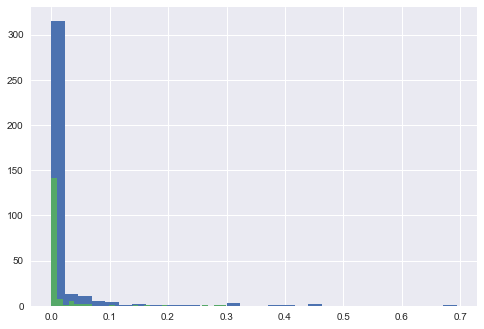

-1, Кредиторская задолженность, RUB


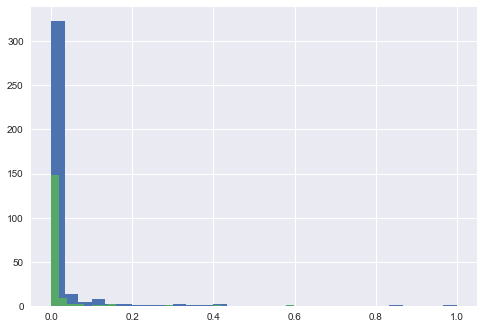

-4, Краткосрочные обязательства, RUB


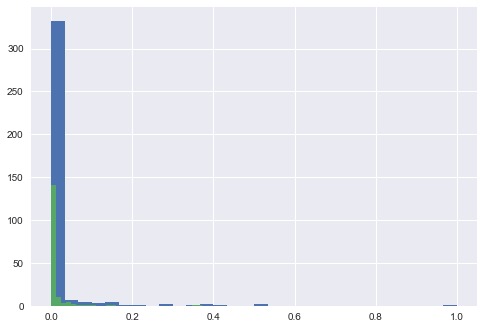

-3, Краткосрочные обязательства, RUB


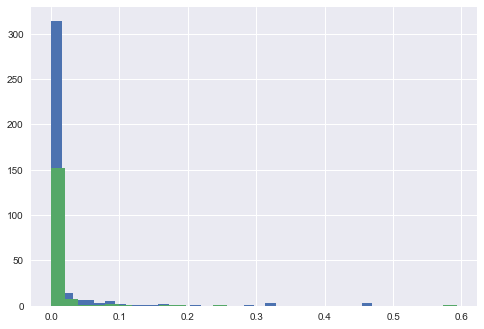

-2, Краткосрочные обязательства, RUB


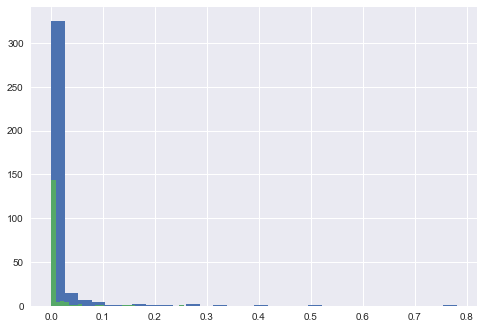

-1, Краткосрочные обязательства, RUB


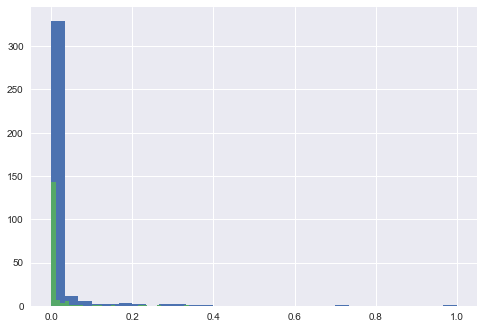

Основные средства  ,прирост за -3 год


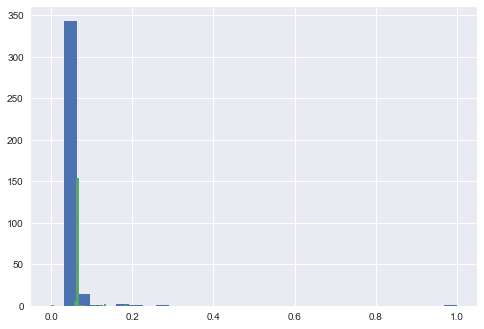

Основные средства  ,прирост за -2 год


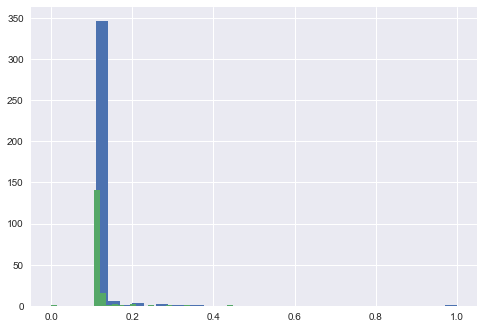

Основные средства  ,прирост за -1 год


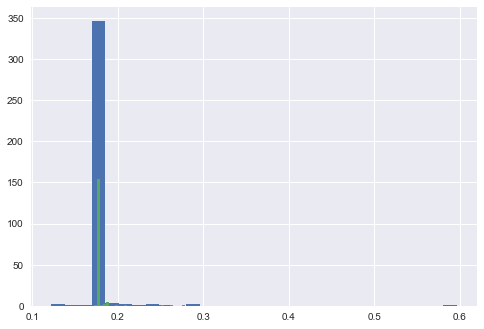

Внеоборотные активы ,прирост за -3 год


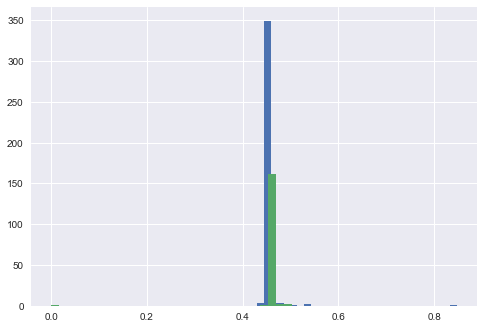

Внеоборотные активы ,прирост за -2 год


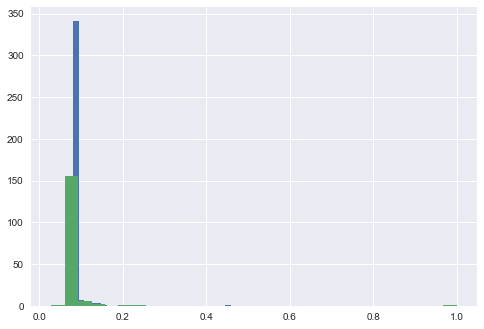

Внеоборотные активы ,прирост за -1 год


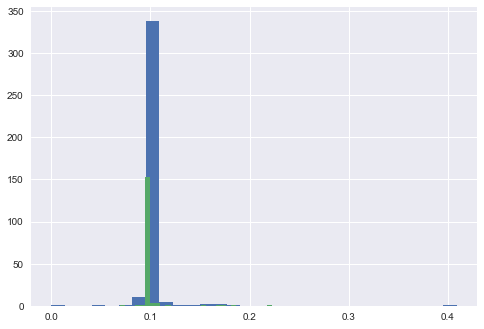

Дебиторская задолженность ,прирост за -3 год


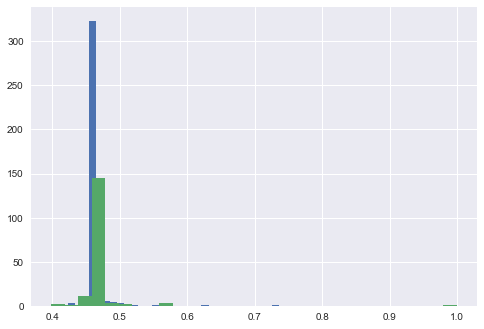

Дебиторская задолженность ,прирост за -2 год


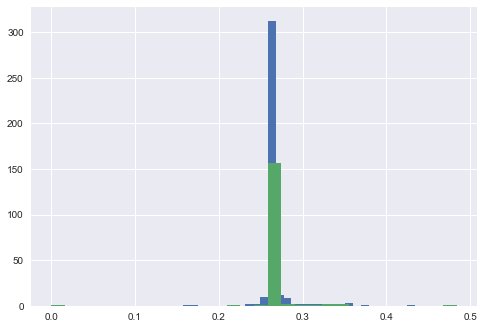

Дебиторская задолженность ,прирост за -1 год


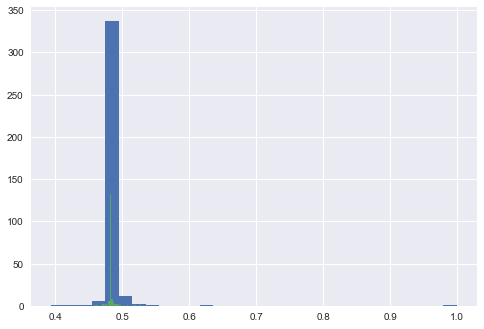

Оборотные активы ,прирост за -3 год


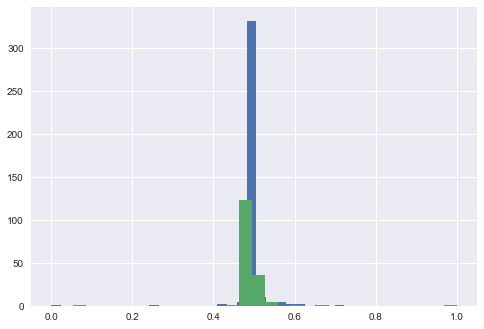

Оборотные активы ,прирост за -2 год


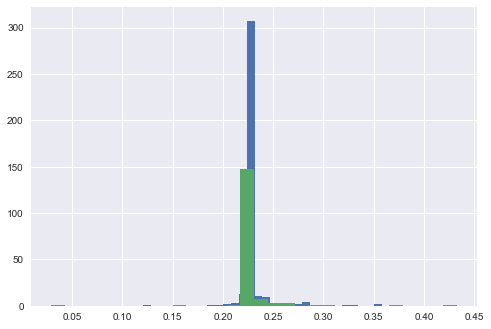

Оборотные активы ,прирост за -1 год


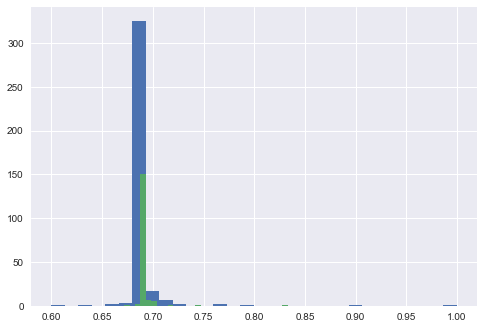

Кредиторская задолженность ,прирост за -3 год


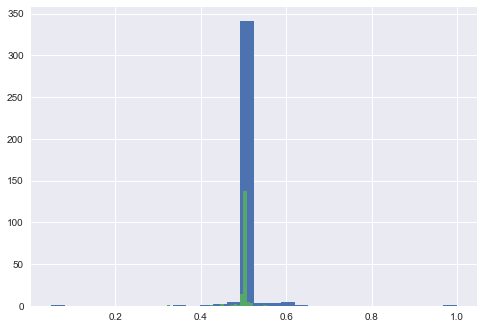

Кредиторская задолженность ,прирост за -2 год


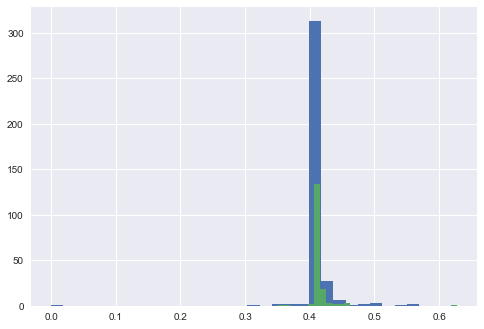

Кредиторская задолженность ,прирост за -1 год


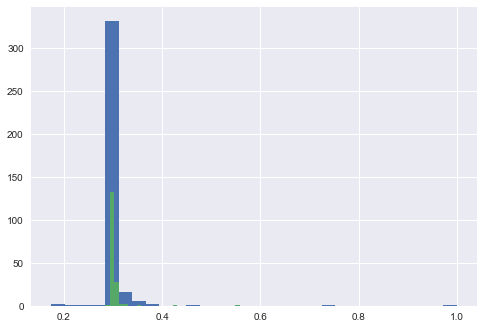

Краткосрочные обязательства ,прирост за -3 год


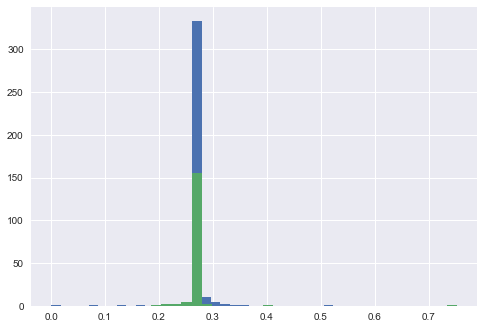

Краткосрочные обязательства ,прирост за -2 год


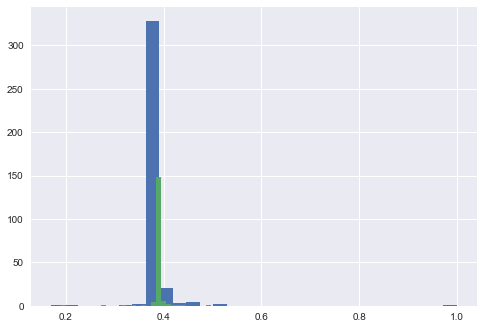

Краткосрочные обязательства ,прирост за -1 год


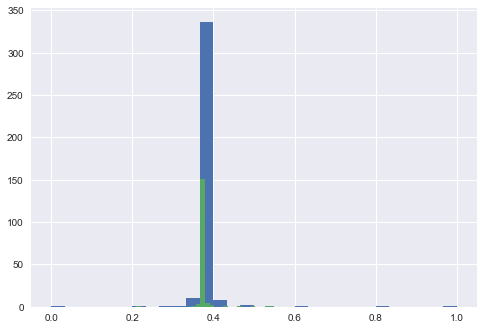

Основные средства , относительный прирост за -3 год


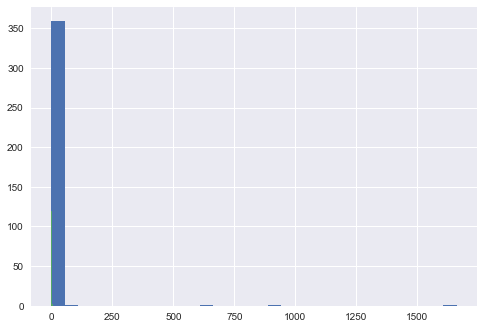

Основные средства , относительный прирост за -2 год


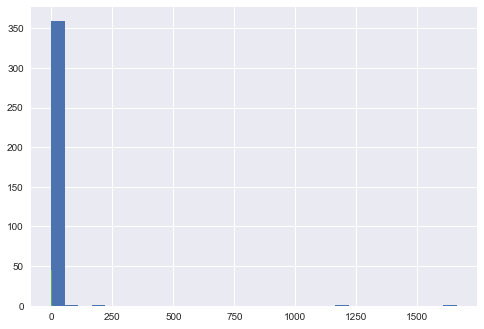

Основные средства , относительный прирост за -1 год


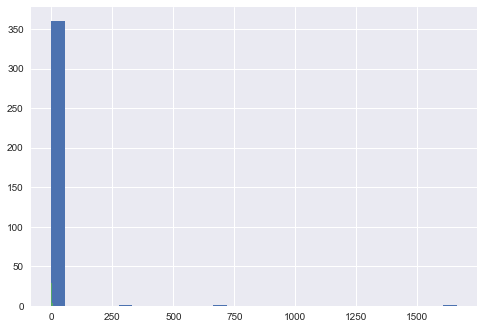

Внеоборотные активы, относительный прирост за -3 год


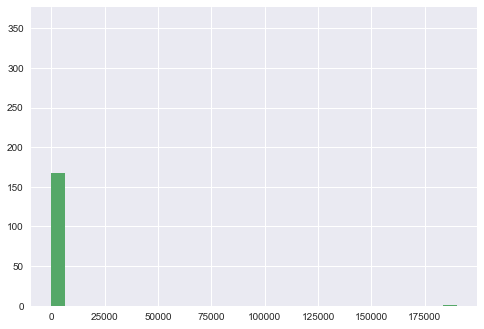

Внеоборотные активы, относительный прирост за -2 год


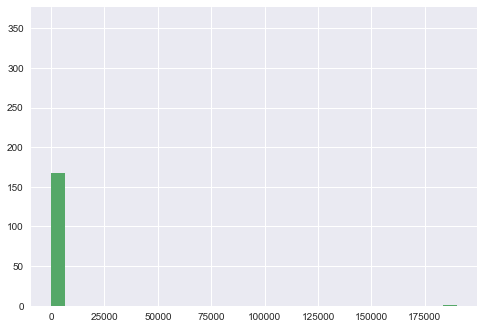

Внеоборотные активы, относительный прирост за -1 год


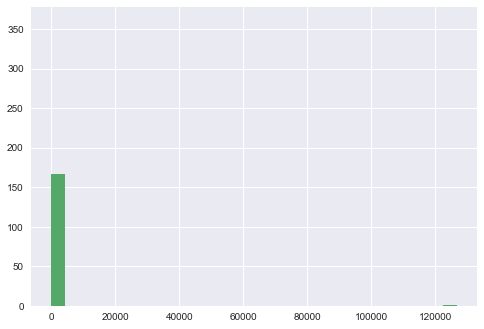

Дебиторская задолженность, относительный прирост за -3 год


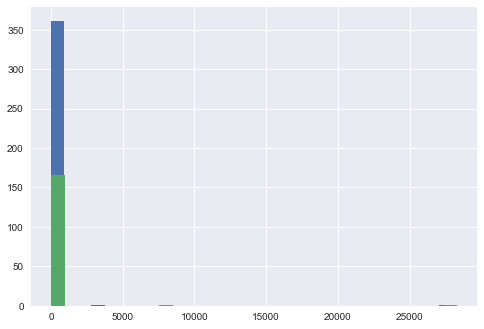

Дебиторская задолженность, относительный прирост за -2 год


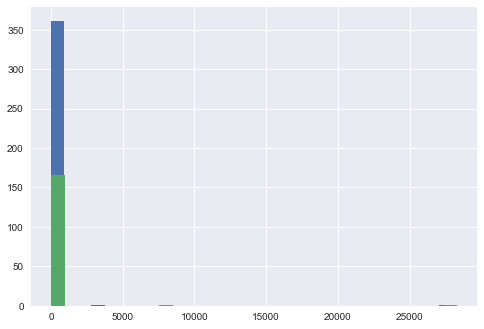

Дебиторская задолженность, относительный прирост за -1 год


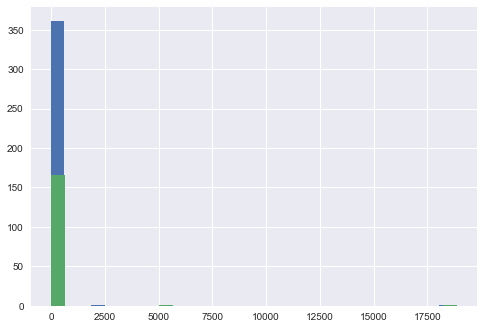

Оборотные активы, относительный прирост за -3 год


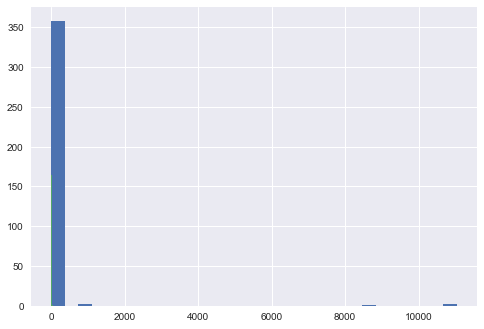

Оборотные активы, относительный прирост за -2 год


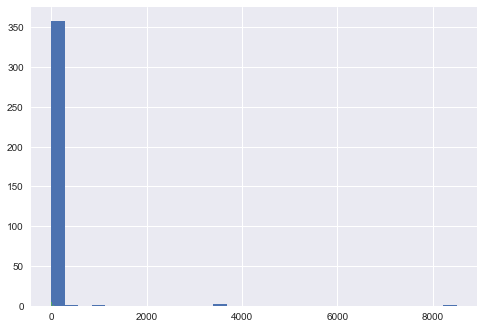

Оборотные активы, относительный прирост за -1 год


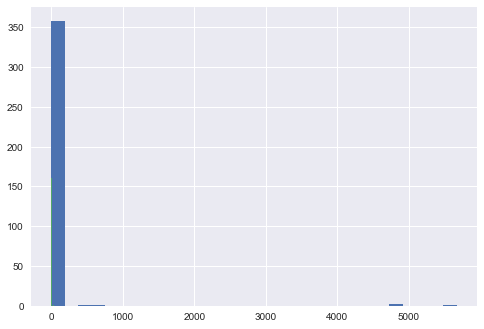

Кредиторская задолженность, относительный прирост за -3 год


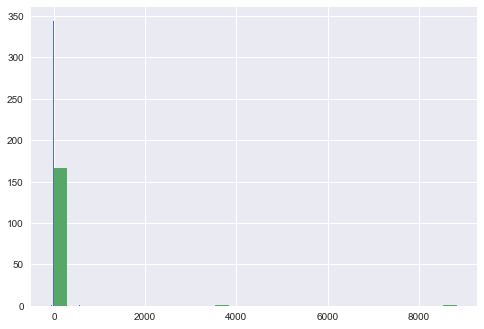

Кредиторская задолженность, относительный прирост за -2 год


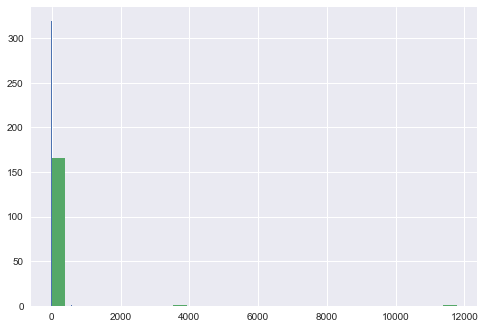

Кредиторская задолженность, относительный прирост за -1 год


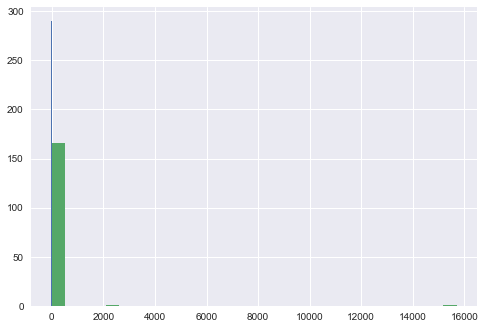

Краткосрочные обязательства, относительный прирост за -3 год


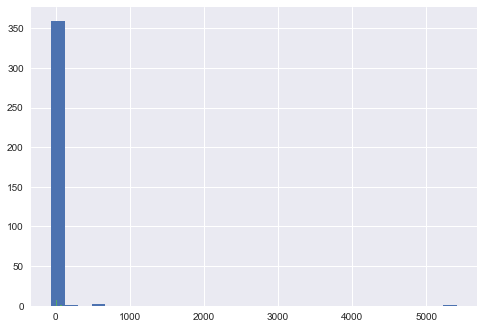

Краткосрочные обязательства, относительный прирост за -2 год


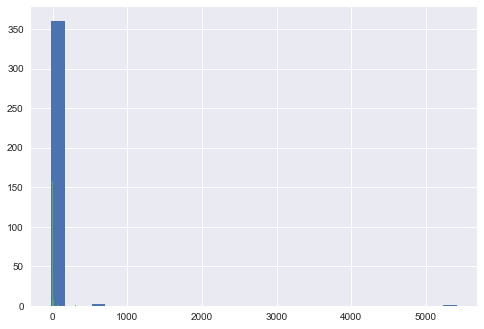

Краткосрочные обязательства, относительный прирост за -1 год


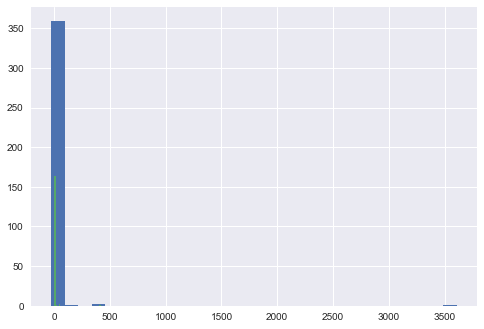

In [22]:
for col in new_cols: #X_train.columns:
    print(col)
    # sns.displot(data=X_train.iloc[np.where(y_train == 1)], x=col)#, kde=True)
    # sns.displot(data=X_train.iloc[np.where(y_train == 0)], x=col)#, kde=True)
    plt.hist(X_train.iloc[np.where(y_train == 1)][col], bins=30)
    plt.hist(X_train.iloc[np.where(y_train == 0)][col], bins=30)
    plt.show()

In [125]:
np.around(model.predict_proba(X_train)[:, 1][:100], 3)

array([0.069, 0.019, 0.028, 0.03 , 0.14 , 0.345, 0.019, 0.706, 0.577,
       0.715, 0.644, 0.717, 0.024, 0.027, 0.017, 0.017, 0.014, 0.015,
       0.017, 0.013, 0.018, 0.024, 0.015, 0.069, 0.017, 0.064, 0.014,
       0.025, 0.82 , 0.115, 0.075, 0.032, 0.018, 0.014, 0.034, 0.015,
       0.014, 0.084, 0.028, 0.499, 0.014, 0.018, 0.02 , 0.737, 0.189,
       0.371, 0.021, 0.015, 0.026, 0.03 , 0.016, 0.158, 0.059, 0.022,
       0.065, 0.014, 0.015, 0.035, 0.014, 0.715, 0.651, 0.076, 0.023,
       0.315, 0.017, 0.518, 0.699, 0.018, 0.04 , 0.016, 0.047, 0.047,
       0.019, 0.015, 0.014, 0.024, 0.077, 0.033, 0.616, 0.02 , 0.017,
       0.727, 0.018, 0.017, 0.691, 0.016, 0.72 , 0.016, 0.018, 0.041,
       0.021, 0.017, 0.018, 0.015, 0.015, 0.744, 0.018, 0.169, 0.013,
       0.018])

In [126]:
probas = model.predict_proba(X_test)[:, 1]

In [127]:
np.around(probas[:100],3)

array([0.052, 0.027, 0.051, 0.06 , 0.062, 0.017, 0.021, 0.206, 0.159,
       0.025, 0.018, 0.016, 0.014, 0.017, 0.025, 0.051, 0.044, 0.015,
       0.463, 0.446, 0.03 , 0.018, 0.016, 0.032, 0.023, 0.484, 0.015,
       0.027, 0.016, 0.056, 0.111, 0.627, 0.602, 0.016, 0.752, 0.014,
       0.698, 0.452, 0.017, 0.066, 0.095, 0.016, 0.254, 0.042, 0.015,
       0.028, 0.654, 0.032, 0.4  , 0.722, 0.75 , 0.21 , 0.048, 0.464,
       0.018, 0.737, 0.018, 0.014, 0.713, 0.055, 0.021, 0.024, 0.017,
       0.042, 0.016, 0.014, 0.535, 0.034, 0.015, 0.54 , 0.016, 0.436,
       0.735, 0.296, 0.02 , 0.046, 0.527, 0.088, 0.08 , 0.746, 0.078,
       0.016, 0.029, 0.016, 0.019, 0.015, 0.633, 0.774, 0.018, 0.729,
       0.341, 0.021, 0.028, 0.019, 0.025, 0.017, 0.024, 0.015, 0.016,
       0.533])

In [128]:
best = 0
xx = 0
for x in sorted(probas):
    pr = precision_score(y_test, probas >= x)
    rl = recall_score(y_test, probas >= x)
    best_ = f1_score(y_test, probas >= x)
    # best_ = pr * rl
    if best_ >= best:
        best = best_
        xx = x


In [129]:
xx

0.02294758580459602

In [130]:
precision_score(y_test, probas >= xx), recall_score(y_test, probas >= xx)

(0.5142857142857142, 0.8108108108108109)